# **Introduction to Machine Learning with Jupyter Notebooks**
Welcome to the world of Machine Learning. This instructional materials will guide you to learn machine learning using Jupyter Notebook.

## **Getting Started**
### **1. Setting Up Your Environment**
Before we go deep into machine learning, you'll need to set up your environment.
follow these steps to set up your environment.

**Install Jupyter Notebook**:

Install the classic Jupyter Notebook by writting the below command in your terminal:

`pip install notebook`

### **2. Launching Jupyter Notebook**

To run the notebook:

`jupyter notebook`

or if this doesnt work, write this insteade.

`python -m notebook`

## **Basics of Machain Learning (ML)**
### **What is Machine Learning?**
It is a subset of Artificial Inteligence (AI). It focuses on making a model capable of learning from data to make predictions or decisions.

### **Types of Machaine Learning:**
1. *Supervised Learning*: Learning from labeled data (e.g., classification, regression).
2. *Unsupervised Learning*: Finding patterns in unlabeled data (e.g., clustering, dimensionality reduction).
3. *Reinforcement Learning*: Learning through rewards and punishments.

## **Building your first ML Model**

**Task**: Predicting Patient Health using TensorFlow and Jupyter Notebook.

**Objective**:
Develop instructional materials for students to learn machine learning using Jupyter Notebook and other ML tools.The aim is to accurately predict patient health conditions(normal,serious,dischargeable) based on temperature, pulse, and blood cell counts.


**Tools and Technologies**:

**1**.	Jupyter Notebook: For data preprocessing, model development, and training.

**2**.	Programming Language: Python - Widely used for its simplicity, extensive libraries, and ecosystem support.



## **Task Steps:**

### **1. Import libraries:**
We will import the necessary libraries first

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd     # for data acquisition
import numpy as np      # for data processing
import tensorflow as tf # for making the model

In [3]:
!pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=9ce3a2a097a57d2f0f38c24cf9877cca0def9b1a05c4c5c810a454ee76abfce9
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [4]:
!pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement skicit-learn (from versions: none)
ERROR: No matching distribution found for skicit-learn


In [5]:
!pip install seaborn

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from micromlgen import port
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **2. Dataset Acquisition:**
We will use the provided medical dataset for this project.


In [7]:
data = pd.read_csv('dataset.csv')  # Load the dataset

In [8]:
data.head(5)  # Display the first few rows of the dataset

,id,gender,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
0,1.0,male,66.0,70.0,38.6,88.0,75.0,Infected
1,2.0,female,56.0,74.0,39.6,88.0,70.0,Infected
2,3.0,male,46.0,82.0,37.2,98.0,83.0,Non Infected
3,4.0,female,60.0,90.0,38.6,98.0,75.0,Non Infected
4,5.0,male,58.0,72.0,39.6,93.0,78.0,Infected


## Determine Medical Condition

In [9]:
def determine_medical_condition(row):
    heart_rate = row['heart_rate']
    temperature = row['temperature']
    spo2 = row['SpO2_saturation']

    if 60 <= heart_rate <= 100 and 36.1 <= temperature <= 37.2 and 95 <= spo2 <= 100:
        return 0 #"Normal"
    elif heart_rate > 100 or heart_rate < 60 or temperature > 37.2 or temperature < 36.1 or spo2 < 95:
        return 1 #"Serious"
    else:
        return 2 #"Dischargeable"
# refer data website

In [10]:
# Apply the function to the DataFrame to create the 'health_condition' column
data['health_condition'] = data.apply(determine_medical_condition, axis=1)

In [11]:
# Display the updated DataFrame
print(data.head(20))

      id  gender   age  heart_rate  temperature  SpO2_saturation   bpm  \
0    1.0    male  66.0        70.0         38.6             88.0  75.0   
1    2.0  female  56.0        74.0         39.6             88.0  70.0   
2    3.0    male  46.0        82.0         37.2             98.0  83.0   
3    4.0  female  60.0        90.0         38.6             98.0  75.0   
4    5.0    male  58.0        72.0         39.6             93.0  78.0   
5    6.0  female  44.0        72.0         37.2             93.0  69.0   
6    7.0    male  34.0        67.0         38.6             98.0  73.0   
7    8.0    male  37.0        72.0         39.6             97.0  73.0   
8    9.0    male  39.0        65.0         37.2             96.0  84.0   
9   10.0    male  56.0        76.0         38.0             92.0  68.0   
10  11.0  female  18.0        73.0         38.6             50.0  73.0   
11  12.0  female  32.0        64.0         39.6             97.0  79.0   
12  13.0    male  37.0        63.0    

### **Data Preprocessing & Visualization**:

Handle missing values and encode categorical variables.

In [12]:
# Dataset Preprocessing
X = data[['heart_rate', 'temperature', 'SpO2_saturation']] #features
y = data['health_condition'] #target


<Axes: >

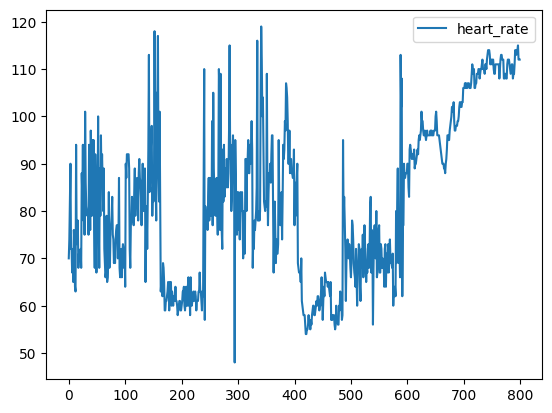

In [13]:
X[['heart_rate']].plot()  # plot of heart_rate

<Axes: >

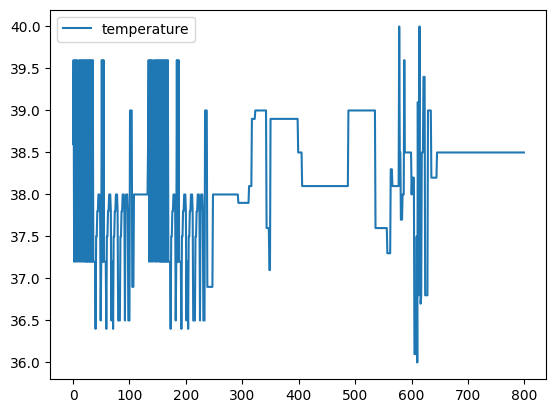

In [14]:
X[['temperature']].plot() # plot of temperature

<Axes: >

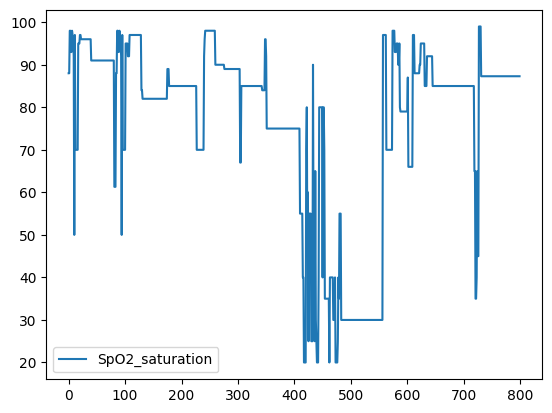

In [15]:
X[['SpO2_saturation']].plot()  # plot of SpO2_saturation

In [16]:
data.nunique()  # finding for the count of unique values

id                  800
gender                2
age                  83
heart_rate           67
temperature          28
SpO2_saturation      33
bpm                  60
Health_status         4
health_condition      3
dtype: int64

In [17]:
data.shape # gives the shape of data

(1059, 9)

In [18]:
data.columns # gives the columns of data

Index(['id', 'gender', 'age', 'heart_rate', 'temperature', 'SpO2_saturation',
       'bpm', 'Health_status', 'health_condition'],
      dtype='object')

In [19]:
data.info() # All information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                800 non-null    float64
 1   gender            705 non-null    object 
 2   age               690 non-null    float64
 3   heart_rate        800 non-null    float64
 4   temperature       800 non-null    float64
 5   SpO2_saturation   800 non-null    float64
 6   bpm               800 non-null    float64
 7   Health_status     800 non-null    object 
 8   health_condition  1059 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 74.6+ KB


In [20]:
data= data[["heart_rate","temperature","SpO2_saturation","health_condition"]] # taking only the required data

In [21]:
data.head()  # shows some data from starting

,heart_rate,temperature,SpO2_saturation,health_condition
0,70.0,38.6,88.0,1
1,74.0,39.6,88.0,1
2,82.0,37.2,98.0,0
3,90.0,38.6,98.0,1
4,72.0,39.6,93.0,1


In [22]:
data.info()  # again checking the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   heart_rate        800 non-null    float64
 1   temperature       800 non-null    float64
 2   SpO2_saturation   800 non-null    float64
 3   health_condition  1059 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 33.2 KB


In [23]:
data.isna().sum() # searching for null values

heart_rate          259
temperature         259
SpO2_saturation     259
health_condition      0
dtype: int64

In [24]:
data.duplicated().sum() # searching for the duplicate values

533

In [25]:
data.drop_duplicates(inplace=True)  # deleting the duplicate values
data.shape

(526, 4)

In [26]:
data["health_condition"].unique() # gives the unique values of health_condition

array([1, 0, 2])

<Axes: xlabel='health_condition'>

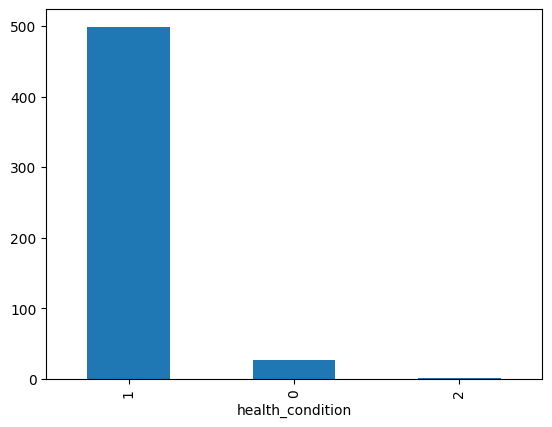

In [27]:
data["health_condition"].value_counts().plot.bar()  # plot of health_condition

In [28]:
data["health_condition"].value_counts()  # gives the value count of every unique health conditions

health_condition
1    499
0     26
2      1
Name: count, dtype: int64

### A Seaborn heatmap is a data visualization tool that displays a matrix of values as a grid of colors, making it easy to identify patterns, correlations, and variations in the data. It is particularly useful for visualizing correlation matrices, confusion matrices, and other types of matrix data.

<Axes: >

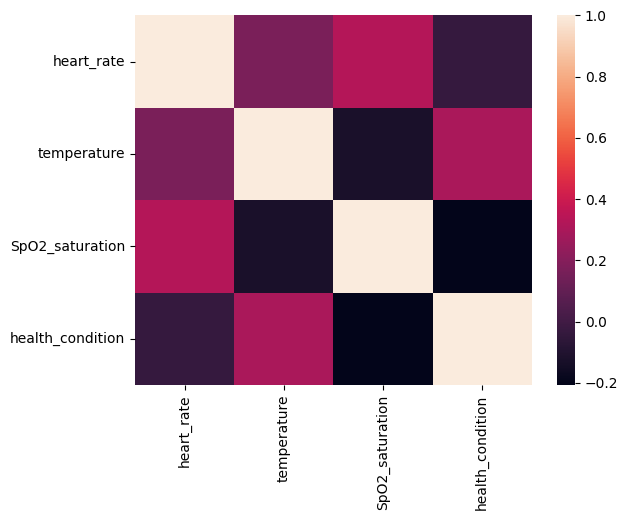

In [29]:
sns.heatmap(data.corr())  # plot the heat map of the data

In [30]:
# Fill missing values
data.fillna(method='ffill', inplace=True)

In [31]:
# Convert all feature columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [32]:
# Fill any remaining NaNs that might have been introduced
data.fillna(0, inplace=True)

In [33]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['health_condition'] = label_encoder.fit_transform(data['health_condition'])

In [34]:
# Define features and target
X = data.drop('health_condition', axis=1)
y = data['health_condition']

### **3. Model Development:**
Split the dataset into training and testing sets, and implement a Decision Tree Classifier using TensorFlow.

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Build the Decision Tree Classifier model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **4. Model Training**
Train the model using the training data and monitor its performance.

In [38]:
X = data.loc[:,["heart_rate","temperature","SpO2_saturation"]]

In [39]:
X

,heart_rate,temperature,SpO2_saturation
0,70.0,38.6,88.0
1,74.0,39.6,88.0
2,82.0,37.2,98.0
3,90.0,38.6,98.0
4,72.0,39.6,93.0
...,...,...,...
742,113.0,38.5,87.3
743,114.0,38.5,87.3
763,108.0,38.5,87.3
796,115.0,38.5,87.3


In [40]:
y = data.iloc[:,3].astype(int)

In [41]:
y

0      1
1      1
2      0
3      1
4      1
      ..
742    1
743    1
763    1
796    1
800    2
Name: health_condition, Length: 526, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [43]:
X_train.values.tolist()

[[83.0, 38.0, 89.0],
 [90.0, 40.0, 88.0],
 [71.0, 38.0, 97.0],
 [56.0, 38.1, 20.0],
 [59.0, 38.1, 65.0],
 [88.0, 39.6, 96.0],
 [79.0, 37.9, 89.0],
 [89.0, 38.3, 88.0],
 [82.0, 38.9, 75.0],
 [72.0, 37.2, 93.0],
 [85.0, 38.0, 97.0],
 [68.0, 38.0, 91.0],
 [98.0, 38.5, 85.0],
 [80.0, 37.1, 96.0],
 [78.0, 38.6, 70.0],
 [101.0, 38.5, 85.0],
 [58.0, 38.1, 30.0],
 [90.0, 38.6, 98.0],
 [92.0, 38.0, 89.0],
 [62.0, 38.5, 79.0],
 [80.0, 37.5, 91.0],
 [80.0, 38.0, 97.0],
 [61.0, 38.1, 55.0],
 [72.0, 39.0, 85.0],
 [101.0, 39.6, 96.0],
 [102.0, 38.5, 79.0],
 [66.0, 37.8, 85.0],
 [78.0, 39.6, 96.0],
 [72.0, 39.6, 97.0],
 [64.0, 36.4, 85.0],
 [97.0, 36.8, 95.0],
 [78.0, 38.0, 97.0],
 [76.0, 37.2, 96.0],
 [61.0, 36.4, 82.0],
 [93.0, 38.5, 85.0],
 [91.0, 38.0, 97.0],
 [79.0, 38.0, 97.0],
 [93.0, 39.0, 85.0],
 [58.0, 37.5, 85.0],
 [76.0, 36.9, 98.0],
 [87.0, 36.9, 70.0],
 [103.0, 37.2, 82.0],
 [59.0, 37.8, 85.0],
 [89.0, 37.7, 95.0],
 [62.0, 38.1, 98.0],
 [88.0, 38.9, 75.0],
 [62.0, 38.1, 70.0],
 [96.0, 3

In [44]:
# Convert to Pandas Series if y_train is a NumPy array
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

In [45]:
# Now you can use y_train.values.tolist() if necessary
y_train_list = y_train.values.tolist()
print(y_train_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [46]:
health_classifier = DecisionTreeClassifier(random_state = 0)
health_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [47]:
type(health_classifier)

sklearn.tree._classes.DecisionTreeClassifier

### **5. Model Evaluation**
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.

In [48]:
# Make predictions
y_pred_array = health_classifier.predict(X_test)

In [49]:
# Ensure y_test is a Pandas Series to access its index
if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test)

In [50]:
# Create DataFrame from the predictions
y_pred = pd.DataFrame(y_pred_array, columns=["health_condition"])

In [51]:
# Set the index of the DataFrame to match y_test index
y_pred.index = y_test.index

In [52]:
# Ensure the data type is int
y_pred = y_pred.astype(int)

In [53]:
print(y_pred)

     health_condition
373                 1
498                 1
6                   1
209                 1
79                  1
..                ...
480                 1
24                  0
17                  1
318                 1
67                  1

[158 rows x 1 columns]


In [54]:
y_test = np.array(y_test,dtype = int)

In [55]:
type(y_test)

numpy.ndarray

In [56]:
y_test

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

In [57]:
# Measure Accuracy
metrics.accuracy_score(y_test,y_pred)

0.9810126582278481

In [58]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.99      0.99      0.99       146
           2       0.00      0.00      0.00         1

    accuracy                           0.98       158
   macro avg       0.63      0.63      0.63       158
weighted avg       0.97      0.98      0.98       158



### **6. Model Deployment**
Save the trained model for future use and deploying it in real-world applications.

In [59]:
print(port(health_classifier))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[2] <= 95.5) {
                            if (x[2] <= 94.0) {
                                return 1;
                            }

                            else {
                                if (x[0] <= 96.5) {
                                    return 1;
                                }

                                else {
                                    if (x[0] <= 99.0) {
                                        return 0;
                                    }

                                    else {
                                        return 1;
                                    }
                                }
                 

Now copy the above Decision Tree classifier code and save in any text file with name

```
DecisionTree.h
```

Then copy the below arduino code and save it named as

```
health_determining_model.ino
```




```
#include <Wire.h>  
#include "MAX30100_PulseOximeter.h"
#include "DecisionTree.h"

Eloquent::ML::Port::DecisionTree health_Classifier;

#define TEMPERATURE_SENSOR_PIN 32  // Analog pin for the temperature sensor (replace with the actual pin number)
#define HEART_RATE_SENSOR_PIN 35   // Analog pin for the heart rate sensor (replace with the actual pin number)

// Initialize the PulseOximeter library
PulseOximeter pox;

// Variable Declaration
float t;
int h;
int s;
int prediction;

void setup() {
  Serial.begin(9600);
  Serial.println("Welcome!");

  pinMode(TEMPERATURE_SENSOR_PIN, INPUT);  
  pinMode(HEART_RATE_SENSOR_PIN, INPUT);   

  // Initialize the Pulse Oximeter
  if (!pox.begin()) {
    Serial.println("Failed to initialize pulse oximeter!");
    while (1);
  } else {
    Serial.println("Pulse oximeter initialized successfully!");
  }
}

void loop() {
  delay(2000);

  // Sensor data Collection part

  // Read temperature value
  int temperatureValue = analogRead(TEMPERATURE_SENSOR_PIN);
  t = convertToCelsius(temperatureValue);
  Serial.print("Temperature (°C): ");
  Serial.println(t);

  // Read heart rate value
  h = analogRead(HEART_RATE_SENSOR_PIN);
  Serial.print("Heart Rate (bpm): ");
  Serial.println(h);

  // Read SpO2 value
  int s = pox.getSpO2();
  Serial.print("SpO2 (%): ");
  Serial.println(s);

  // Print values of heart_rate, temperature, and SpO2_saturation to serial monitor
  Serial.print(F("Heart_rate: "));
  Serial.print(h);
  Serial.print(F("  Temperature: "));
  Serial.print(t);
  Serial.print(F("  SpO2: "));
  Serial.println(s);

  float input[3] = {h, t, s};
  // Giving input values to predict Function
  int prediction = health_Classifier.predict(input);

  // Checking Condition
  Serial.print("Prediction: ");
  switch (prediction) {
    case 0:
      Serial.println("Normal");
      break;
    case 1:
      Serial.println("Serious");
      break;
    case 2:
      Serial.println("Dischargeable");
      break;
    default:
      Serial.println("Unknown");
      break;
  }

  Serial.println();
  delay(1000);
}

float convertToCelsius(int adcValue) {
  float voltage = adcValue * 3.3 / 4095.0;  // Convert ADC value to voltage for ESP32
  float temperatureCelsius = (voltage - 0.5) * 100;  // Convert voltage to temperature in Celsius
  return temperatureCelsius;
}


```



In [59]:
import serial
import time

# Replace 'COM10' with the appropriate serial port for your system
SERIAL_PORT = 'COM13'
BAUD_RATE = 9600  # the baud rate set on your ESP32

def read_from_esp32():
    # Open the serial connection
    with serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1) as ser:
        # Give some time for the serial connection to establish
        time.sleep(2)

        # Clear any existing input in the buffer
        ser.flushInput()

        try:
            while True:
                # Read data from the ESP32
                if ser.in_waiting > 0:
                    line = ser.readline().decode('utf-8').rstrip()
                    print(f"{line}")
                time.sleep(0.1)

        except KeyboardInterrupt:
            print("Serial read stopped.")

if __name__ == "__main__":
    read_from_esp32()

Now move these both files in same folder then open the "health_determining_model.ino" file in your arduino IDE and upload the code to your Esp32 microcontroller.

Before uploading the code to the board, do verify that the "DecisionTree.h" file is also opened in the same arduino IDE beside the .ino file.

If any error occurs then open the "DecisionTree.h" file and comment the line containing this code

```
#include <cstdarg> // comment this line
```




## About Author

### Developed by Harsh Raj
Contacts :
- [Email](mailto:developerharshraj@gmail.com)
- [LinkedIn](https://in.linkedin.com/in/harsh-raj-416a0b27b)
- [GitHub](https://github.com/HarshRajTiwary)

### Happy Learning